# Homework 1: Predicting House Prices

The goals of this homework are:

    1. Continue familiarizing yourself with pandas, numpy and matplotlib libraries
    2. Learn about more advanced libraries: seaborn and folium
    3. Use a Linear Model to predict house prices

You are encouraged to work together.

Homework 1 is due on Monday, January 27.

In [1]:
'import basic libraries'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
'run this cell only if you need to install folium'
import sys
!{sys.executable} -m pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [3]:
'run this cell only if you need to install seaborn'
import sys
!{sys.executable} -m pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
'import seaborn and folium libraries'
import seaborn as sns
import folium
from folium.plugins import HeatMap

## Get the data

The dataset *kc_house_data* contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [5]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/kc_house_data.csv'
data = pd.read_csv(url)

Let's take a look at the top 10 rows using the DataFrame's head() method

In [6]:
data.head(10) #top 10 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


There are 21 attributes

In [7]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

1. id: Unique ID for each home sold
2. data: Date of the home sale
3. price: Price of each home sold
4. bedrooms: Number of bedrooms
5. bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6. sqft_living: Square footage of the apartments interior living space
7. sqft_lot: Square footage of the land space
8. floors: Number of floors
9. waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
10. view: An index from 0 to 4 of how good the view of the property was
11. condition: An index from 1 to 5 on the condition of the apartment
12. grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
13. sqft_above: The square footage of the interior housing space hat is above ground level
14. sqft_basement: The square footage of the interior housing space that is below ground level
15. yr_built: The year the house was initially built
16. yr_renovated: The year of the house's last renovation
17. zipcode: What zipcode area the house is in
18. lat: Lattitude
19. long: Longitude
20. sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15: The square footage of the land lots of the nearest 15 neighbors.

## Visualize and Examine the Data

The describe() method shows a summary of the numerical attributes.

In [8]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The hist() method plot a histogram for each numerical attribute

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7aa8c2a20>,
      dtype=object)

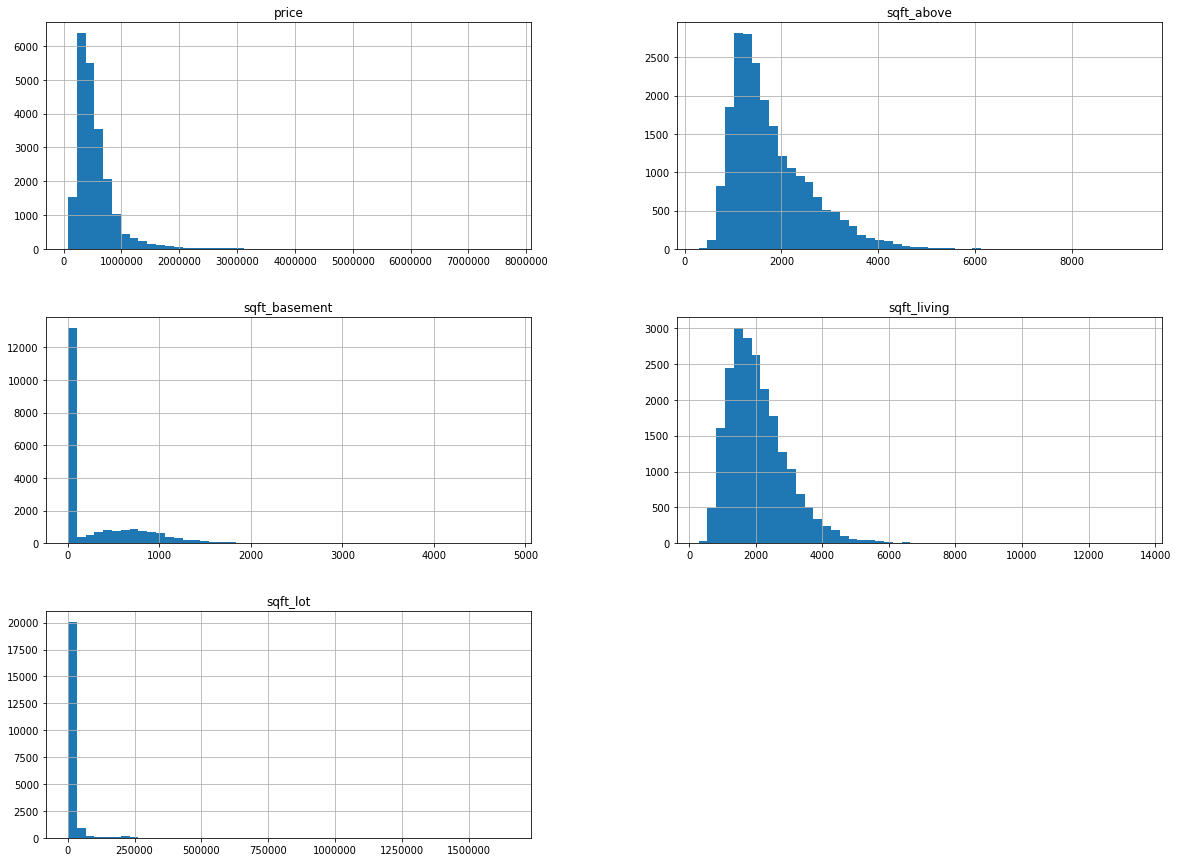

In [9]:
#histograms for the 'price','sqft_living','sqft_lot','sqft_above','sqft_basement' attributes
data[['price','sqft_living','sqft_lot','sqft_above','sqft_basement']].hist(bins=50,figsize=(20,15)) 

You can use seaborn.pairplot() to plot every numerical attribute against every other numerical attribute.

In [10]:
#pairplots for the 'price','sqft_living','sqft_lot','sqft_above','sqft_basement' attributes
#sns.pairplot(data[['price','sqft_living','sqft_lot','sqft_above','sqft_basement']])
#sns.pairplot(data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
 #      'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
  #     'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
   #    'lat', 'long', 'sqft_living15', 'sqft_lot15']])

#datab = data[['price']]
#data.insert(21, 'bathPerBed', np.divide(data[['bathrooms']],data[['bedrooms']]))
#datab[['bathrooms']] = data[['bathrooms']]

#sns.pairplot(data[['price', 'bathPerBed']])

## Advanced Data Visualization: Heat Maps

In [11]:
'''this cell draws a house density heatmap with price range [maxprice,minprice]'''
maxprice = 300000
minprice = 200000
Seattle_map = folium.Map(location=[47.5112, -122.257], control_scale=True, zoom_start=9.4)
data_heatmap = data[(data['price'] >= minprice) & (data['price'] <= maxprice)] 
HeatMap(data=data_heatmap[['lat','long']].to_numpy(),
        radius=8.5,max_zoom=13).add_to(Seattle_map)
Seattle_map

## Assignments:

1. Make sure you understand the code.
2. Train a Linear Model to predict house prices.

    (a) What features are you using?
        sqft_living
        sqft_above
        bathrooms
        bedrooms
        floors
        grade
        sqft_basement
        sqft_lot
        
    
    (b) What MSE do you get?
        1672.77
    
One thing you may want to do before training the model is to try out various attribute combinations. For example, the total number of bathrooms is not very useful if you don't known how many bedrooms there are. What you really want is the number of bathrooms per bedroom.

In [12]:
x = data['sqft_living'].astype(float)
y = data['price'].astype(float)
X = np.c_[np.ones((len(x),1)),x]
theta = np.linalg.lstsq(X,y,rcond=None)[0]
theta

array([-43580.74309447,    280.6235679 ])

Text(0.5, 1.0, 'MSE=1778.3441922528543')

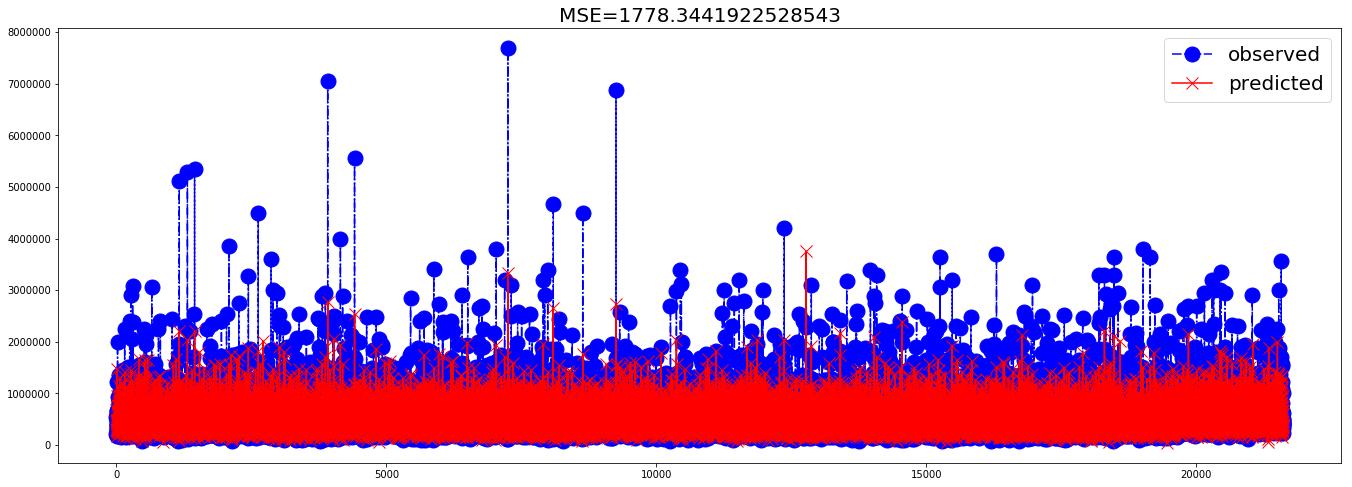

In [13]:
y_predicted = X@theta
plt.figure(figsize=(23,8))
plt.plot(y,'b-.o',markersize=15,label='observed')
plt.plot(y_predicted,'r-x',markersize=12,label='predicted')
plt.legend(fontsize=20)
MSE = np.linalg.norm(X@theta-y)/len(y)
plt.title('MSE='+str(MSE),fontsize=20)

In [14]:
new_col = data['sqft_above'].astype(float)
X = np.c_[X,new_col]
X.shape

(21613, 3)

In [15]:
theta = np.linalg.lstsq(X,y,rcond=None)[0]
theta

array([-4.08599610e+04,  2.95503741e+02, -1.88270108e+01])

Text(0.5, 1.0, 'MSE=1777.6118309763638')

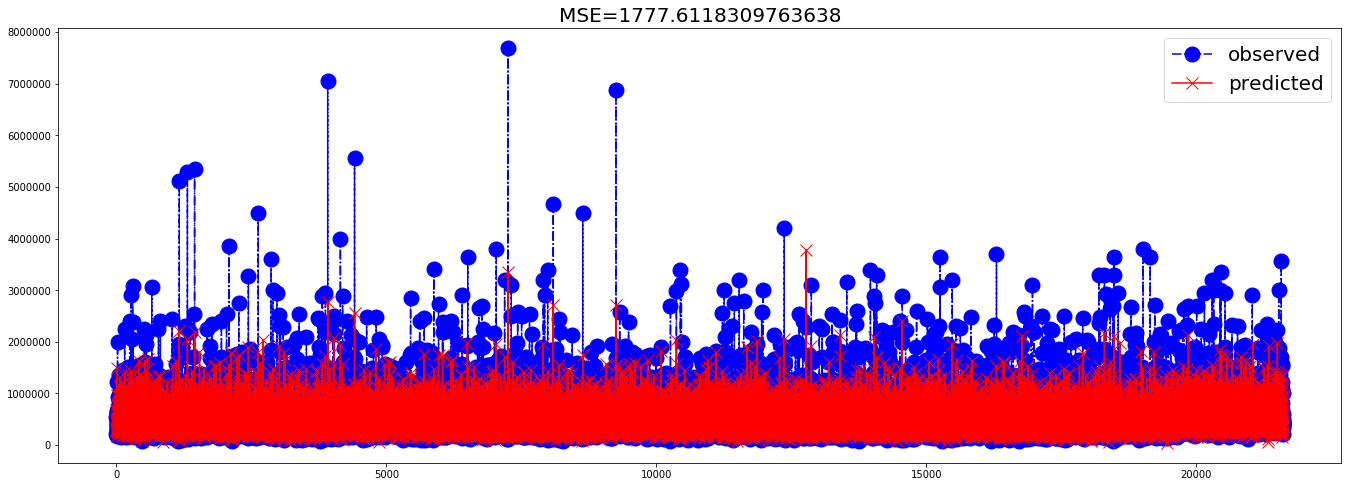

In [16]:
y_predicted = X@theta
plt.figure(figsize=(23,8))
plt.plot(y,'bo-.',markersize=15,label='observed')
plt.plot(y_predicted,'rx-',markersize=12,label='predicted')
plt.legend(fontsize=20)
MSE = np.linalg.norm(X@theta-y)/len(y)
plt.title('MSE='+str(MSE),fontsize=20)

In [25]:
newData = data.replace({'bedrooms':0},np.mean(data['bedrooms']))
newData = data.replace({'bathrooms':0},np.mean(data['bathrooms']))
newData['bbratio'] = newData.bathrooms / newData.bedrooms

new_col = newData['bbratio'].to_numpy()
X = np.c_[X,new_col]
X.shape

(21613, 10)

In [26]:
theta = np.linalg.lstsq(X,y,rcond=None)[0]
theta

ValueError: On entry to DLASCL parameter number 4 had an illegal value

Text(0.5, 1.0, 'MSE=1777.5571455996887')

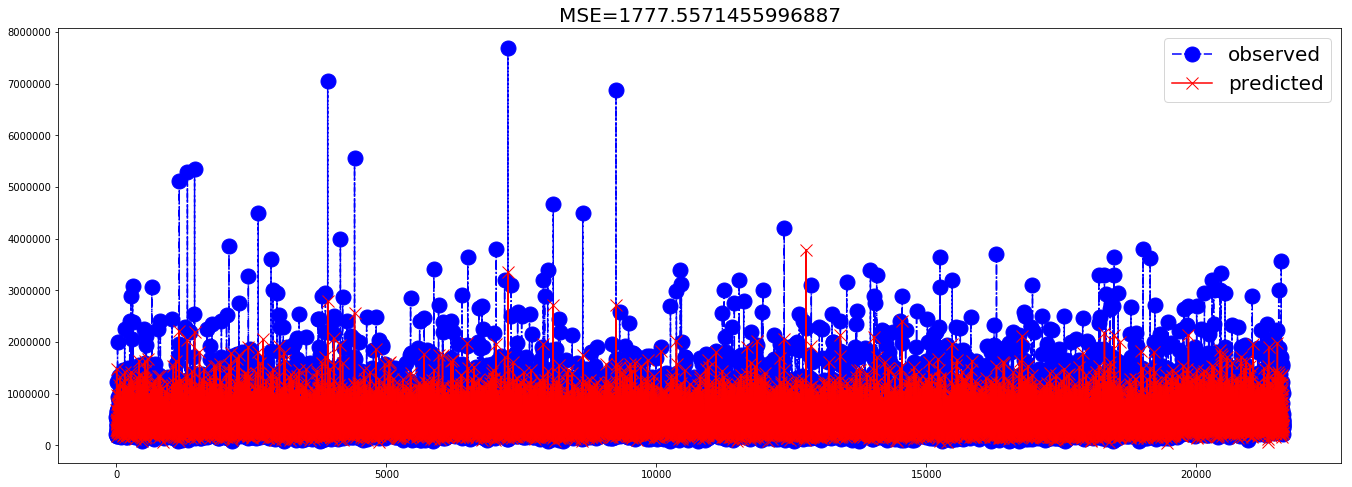

In [19]:
y_predicted = X@theta
plt.figure(figsize=(23,8))
plt.plot(y,'bo-.',markersize=15,label='observed')
plt.plot(y_predicted,'rx-',markersize=12,label='predicted')
plt.legend(fontsize=20)
MSE = np.linalg.norm(X@theta-y)/len(y)
plt.title('MSE='+str(MSE),fontsize=20)

Text(0.5, 1.0, 'MSE=1644.9910419124196')

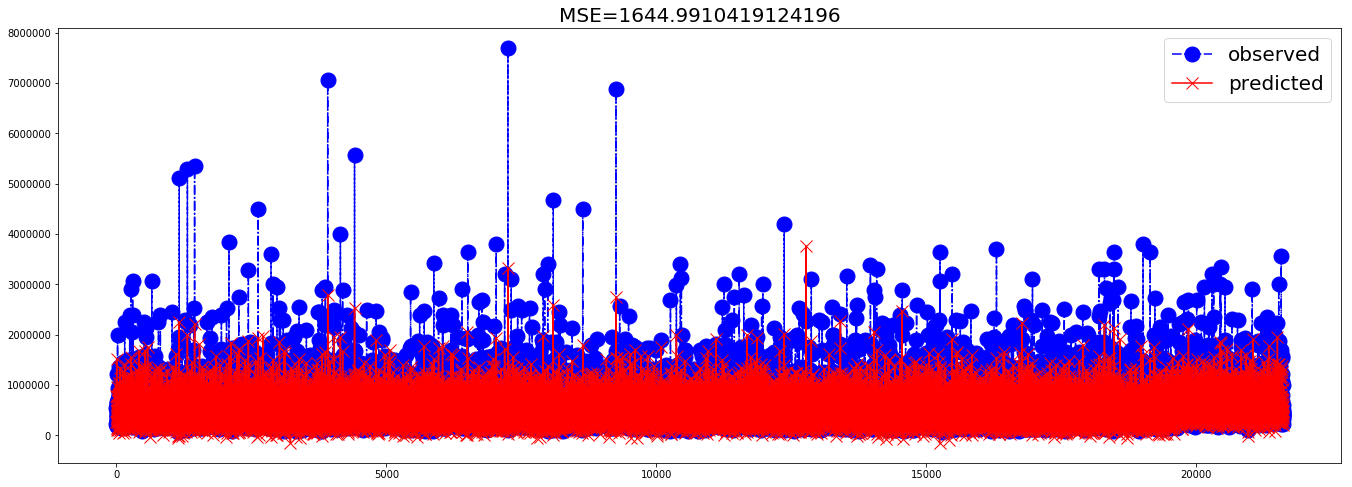

In [20]:
new_col = data['lat'].to_numpy()
X = np.c_[X,new_col]
X.shape

theta = np.linalg.lstsq(X,y,rcond=None)[0]
theta

y_predicted = X@theta
plt.figure(figsize=(23,8))
plt.plot(y,'bo-.',markersize=15,label='observed')
plt.plot(y_predicted,'rx-',markersize=12,label='predicted')
plt.legend(fontsize=20)
MSE = np.linalg.norm(X@theta-y)/len(y)
plt.title('MSE='+str(MSE),fontsize=20)

In [ ]:
new_col = data['long'].to_numpy()
X = np.c_[X,new_col]
X.shape

theta = np.linalg.lstsq(X,y,rcond=None)[0]
theta

y_predicted = X@theta
plt.figure(figsize=(23,8))
plt.plot(y,'bo-.',markersize=15,label='observed')
plt.plot(y_predicted,'rx-',markersize=12,label='predicted')
plt.legend(fontsize=20)
MSE = np.linalg.norm(X@theta-y)/len(y)
plt.title('MSE='+str(MSE),fontsize=20)

Text(0.5, 1.0, 'MSE=1644.9726731069004')

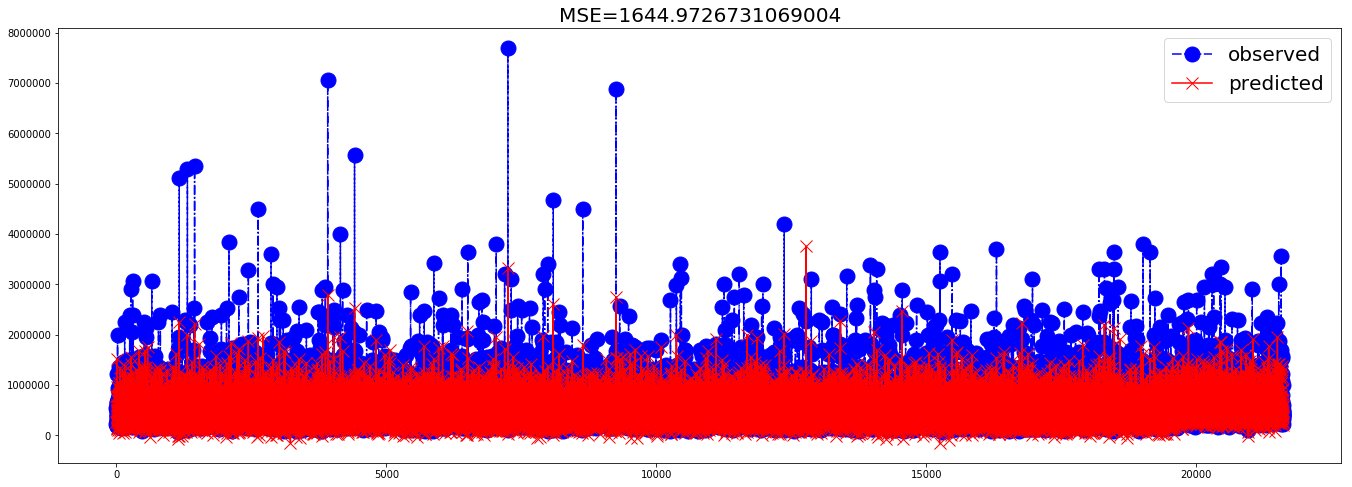

In [21]:
new_col = data['floors'].to_numpy()
X = np.c_[X,new_col]
X.shape

theta = np.linalg.lstsq(X,y,rcond=None)[0]
theta

y_predicted = X@theta
plt.figure(figsize=(23,8))
plt.plot(y,'bo-.',markersize=15,label='observed')
plt.plot(y_predicted,'rx-',markersize=12,label='predicted')
plt.legend(fontsize=20)
MSE = np.linalg.norm(X@theta-y)/len(y)
plt.title('MSE='+str(MSE),fontsize=20)

Text(0.5, 1.0, 'MSE=1577.5274270275452')

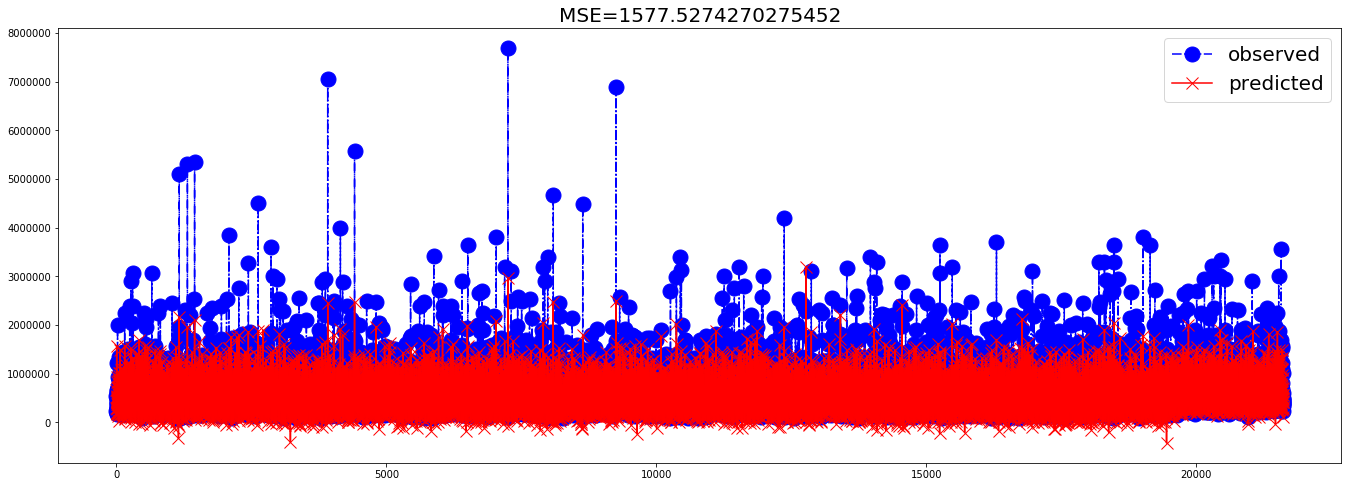

In [22]:
new_col = data['grade'].to_numpy()
X = np.c_[X,new_col]
X.shape

theta = np.linalg.lstsq(X,y,rcond=None)[0]
theta

y_predicted = X@theta
plt.figure(figsize=(23,8))
plt.plot(y,'bo-.',markersize=15,label='observed')
plt.plot(y_predicted,'rx-',markersize=12,label='predicted')
plt.legend(fontsize=20)
MSE = np.linalg.norm(X@theta-y)/len(y)
plt.title('MSE='+str(MSE),fontsize=20)

Text(0.5, 1.0, 'MSE=1577.5274270275445')

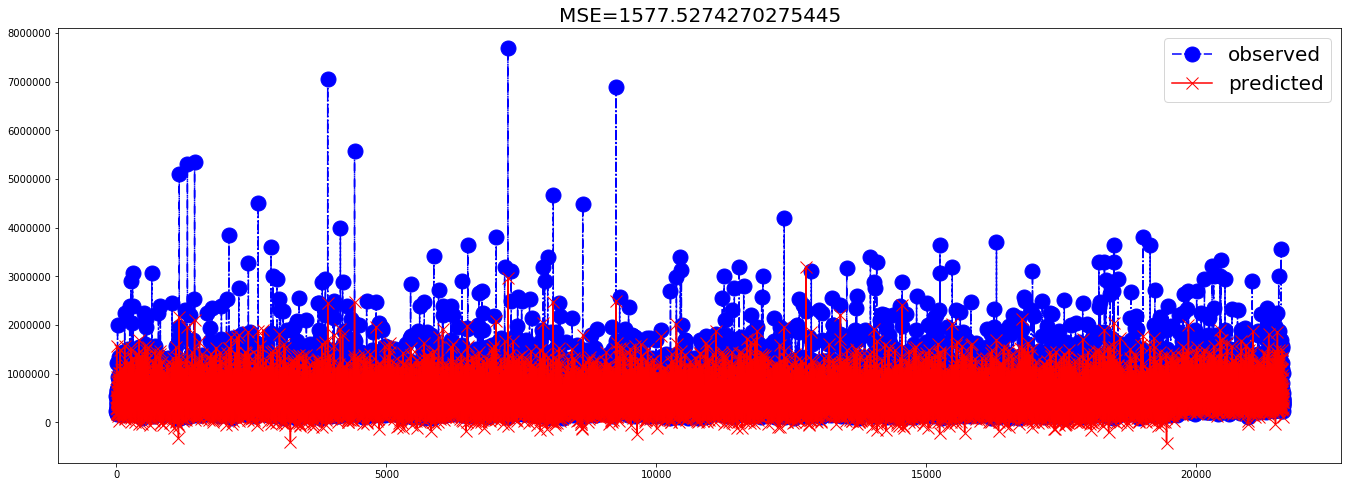

In [23]:
new_col = data['sqft_basement'].to_numpy()
X = np.c_[X,new_col]
X.shape

theta = np.linalg.lstsq(X,y,rcond=None)[0]
theta

y_predicted = X@theta
plt.figure(figsize=(23,8))
plt.plot(y,'bo-.',markersize=15,label='observed')
plt.plot(y_predicted,'rx-',markersize=12,label='predicted')
plt.legend(fontsize=20)
MSE = np.linalg.norm(X@theta-y)/len(y)
plt.title('MSE='+str(MSE),fontsize=20)

Text(0.5, 1.0, 'MSE=1577.4793604329275')

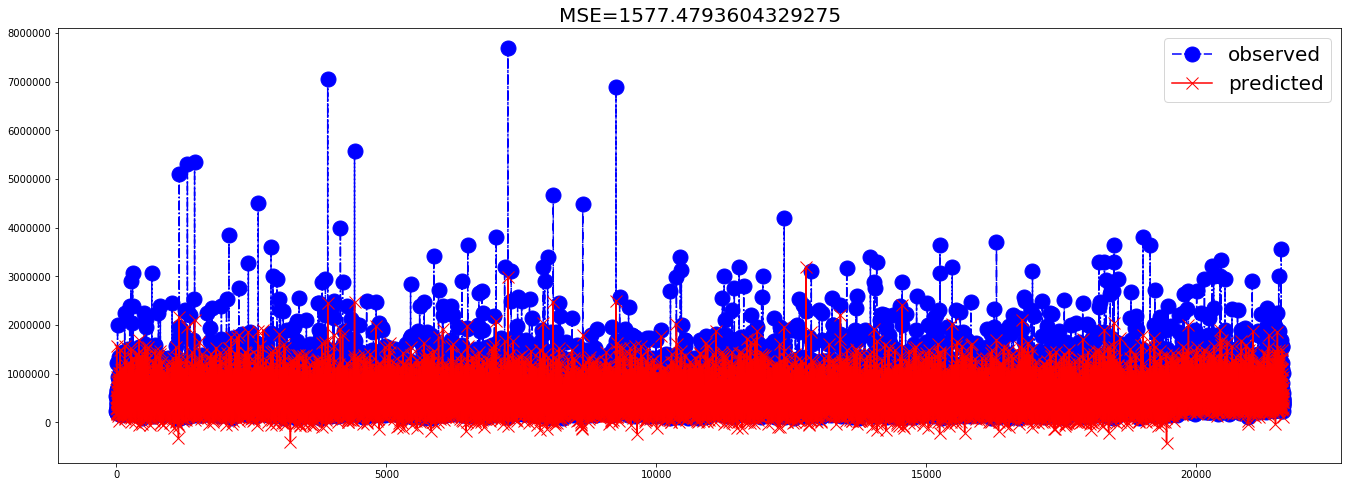

In [24]:
new_col = data['sqft_lot'].to_numpy()
X = np.c_[X,new_col]
X.shape

theta = np.linalg.lstsq(X,y,rcond=None)[0]
theta

y_predicted = X@theta
plt.figure(figsize=(23,8))
plt.plot(y,'bo-.',markersize=15,label='observed')
plt.plot(y_predicted,'rx-',markersize=12,label='predicted')
plt.legend(fontsize=20)
MSE = np.linalg.norm(X@theta-y)/len(y)
plt.title('MSE='+str(MSE),fontsize=20)